In [1]:
import csv
import json
import numpy as np

data=[]
with open("data.csv", "r+", encoding="utf-8") as fp:
    csv_reader=csv.DictReader(fp)
    for row in csv_reader:
        row["age"]=int(row["age"])
        row["absences"]=int(row["absences"])
        row["G1"]=int(row["G1"])
        row["G2"]=int(row["G2"])
        row["G3"]=int(row["G3"])
        row["final"]=row["G1"]+row["G2"]+row["G3"]
        data.append(row)

def jprint(data):
    print(json.dumps(data, indent=4))
    
jprint(data)

[
    {
        "sex": "F",
        "age": 18,
        "address": "U",
        "guardian": "mother",
        "internet": "no",
        "romantic": "no",
        "absences": 6,
        "G1": 5,
        "G2": 6,
        "G3": 6,
        "final": 17
    },
    {
        "sex": "F",
        "age": 17,
        "address": "U",
        "guardian": "father",
        "internet": "yes",
        "romantic": "no",
        "absences": 4,
        "G1": 5,
        "G2": 5,
        "G3": 6,
        "final": 16
    },
    {
        "sex": "F",
        "age": 15,
        "address": "U",
        "guardian": "mother",
        "internet": "yes",
        "romantic": "no",
        "absences": 10,
        "G1": 7,
        "G2": 8,
        "G3": 10,
        "final": 25
    },
    {
        "sex": "F",
        "age": 15,
        "address": "U",
        "guardian": "mother",
        "internet": "yes",
        "romantic": "yes",
        "absences": 2,
        "G1": 15,
        "G2": 14,
        "G3": 15,
        

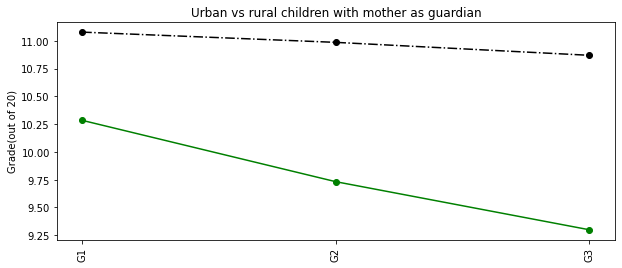

In [8]:
from matplotlib import pyplot as plt

# Get list of rural mother
rmother=[d for d in data if d["address"]=="R"and d["guardian"]=="mother"]
rural_y=[
    np.mean([d["G1"] for d in rmother]),
    np.mean([d["G2"] for d in rmother]),
    np.mean([d["G3"] for d in rmother]),
]
rural_y

# Get list of urban mother
umother=[d for d in data if d["address"]=="U" and d["guardian"]=="mother"]
urban_y=[
    np.mean([d["G1"] for d in umother]),
    np.mean([d["G2"] for d in umother]),
    np.mean([d["G3"] for d in umother]),
]

x_value=["G1","G2","G3"]

# create a line chart, years on x-axis, gdp on y-axis
plt.figure(figsize=(10,4))
plt.plot(x_value,rural_y , color='green', marker='o', linestyle='-')
plt.plot(x_value, urban_y, 'k-.', marker='o')
# add a title
plt.title("Urban vs rural children with mother as guardian")
plt.xticks(x_value, rotation=90)
# add a label to the y-axis
plt.ylabel("Grade(out of 20)")
# plt.show()
plt.savefig('line_chart.png')


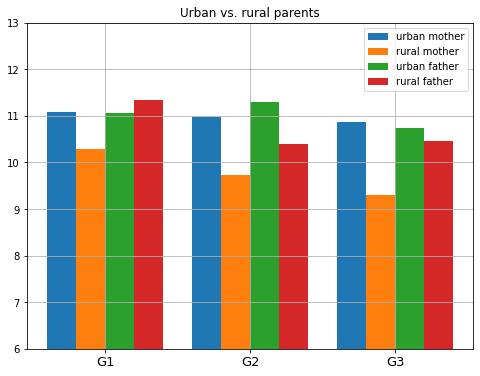

In [16]:
umother=[d for d in data if d["address"]=="U" and d["guardian"]=="mother"]
rmother=[d for d in data if d["address"]=="R" and d["guardian"]=="mother"]
ufather=[d for d in data if d["address"]=="U" and d["guardian"]=="father"]
rfather=[d for d in data if d["address"]=="R" and d["guardian"]=="father"]

def get_grades(sli, *attrs):
    means=[]
    for attr in attrs:
        means.append(np.mean([d[attr] for d in sli]))
    return means

um=get_grades(umother, "G1", "G2", "G3")
rm=get_grades(rmother, "G1", "G2", "G3")
uf=get_grades(ufather, "G1", "G2", "G3")
rf=get_grades(rfather, "G1", "G2", "G3")

plt.figure(figsize=(8,6))
x_values=range(len(um))
width=0.2
plt.bar([x-width*1.5 for x in x_values], um, width, label="urban mother")
plt.bar([x-width/2 for x in x_values], rm, width, label="rural mother")
plt.bar([x+width/2 for x in x_values], uf, width, label="urban father")
plt.bar([x+width*1.5 for x in x_values], rf, width, label="rural father")

x_ticks=["G1","G2","G3"]
plt.xticks(x_values,x_ticks, fontsize=13)
plt.ylim(6,13)
plt.legend(loc='best')
plt.grid()
plt.title("Urban vs. rural parents")

plt.show()

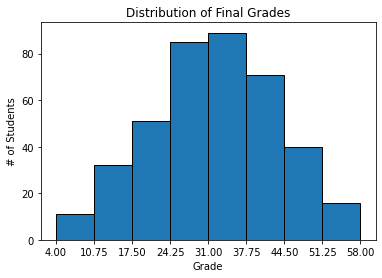

In [17]:
grades = [d["final"] for d in data]
(n, bins, patches)=plt.hist(grades, edgecolor="black", bins=8)
plt.xticks(bins)
plt.xlabel("Grade")
plt.ylabel("# of Students")
plt.title("Distribution of Final Grades")
plt.show()

(0.0, 22.0)

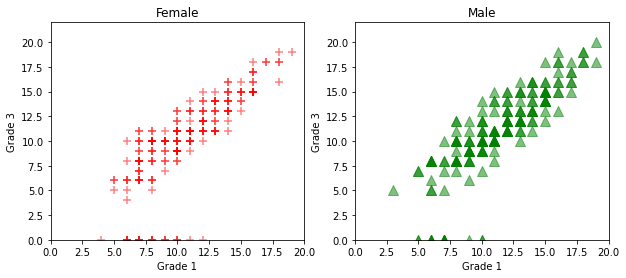

In [22]:
female = [(d["G1"], d["G3"]) for d in data if d["sex"]=="F"]
female

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter([s[0] for s in female], [s[1] for s in female], s=50, c="red", marker="+", alpha=0.5)
plt.title("Female")
plt.xlabel("Grade 1")
plt.ylabel("Grade 3")
plt.xlim(0,20)
plt.ylim(0,22)


male = [(d["G1"], d["G3"]) for d in data if d["sex"]=="M"]
plt.subplot(1, 2, 2)
plt.scatter([s[0] for s in male], [s[1] for s in male], s=100, c="green", marker="^", alpha=0.5)
plt.title("Male")
plt.xlabel("Grade 1")
plt.ylabel("Grade 3")
plt.xlim(0,20)
plt.ylim(0,22)